In [52]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency
from scipy import stats

In [53]:
x=pd.read_csv('../_xlable4_withNa_AllColumns.txt')
y=pd.read_csv('../_targelable4_withNa_AllColumns.txt')

y=y[['Unnamed: 0','L103000', ]]

In [54]:
data= pd.merge(x,y, how='inner',left_on='Unnamed: 0', right_on='Unnamed: 0')
data['max']=np.min(data[['FIELD_6','FIELD_7']],axis=1)
data=data.drop(columns=['FIELD_6','FIELD_7'])

In [55]:
data=data.query('FIELD_15 !=1 and FIELD_17 !=1 and FIELD_22 != 1 and FIELD_24 != 1 and FIELD_16 != 1 and FIELD_23 != 1')
# data=data.query('FIELD_16 != 1 and FIELD_23 != 1')

In [56]:
data=data[data.SEX==0]
# data=data[data.FIELD_15!=1]
# data=data[data.FIELD_17!=1]
# data=data[data.FIELD_22!=1]
# data=data[data.FIELD_24!=1]
data=data[data.AGE>=40]
# data=data[data.AGE<50]

print(data.shape)

(61379, 408)


In [57]:
#split column types to categorical and numerical
numerical_cols = list(data.columns[~data.columns.str.startswith('FIELD')])
categorical_cols = list(data.columns[data.columns.str.startswith('FIELD')])

Calculate correlation Value - for numerical values
========

In [58]:
corr=data[numerical_cols].corr()
corr=corr.L103000_y
corrvalPD=pd.DataFrame()
corrvalPD['Col']=corr.index
corrvalPD['val']=abs(corr.values)

corrvalPD=corrvalPD.sort_values(by='val',ascending=False)
corrvalPD.head()

,Col,val
278,L103000_y,1.0
157,L502500,1.0
149,L500900,1.0
46,L105300,1.0
47,L105700,1.0


In [59]:
#count of none NA values of feature set
mydataset=data.copy()[numerical_cols]
colCount=[]
for i in mydataset.columns:
    colCount.append([i,mydataset[i].dropna().shape[0]])

colCountPD=pd.DataFrame(colCount,columns=['Col','Count'])
colCountPD.head()

,Col,Count
0,Unnamed: 0,61379
1,index,61379
2,COMPARE,61379
3,AGE,61379
4,B_DAY,61379


In [60]:
mergedColCorrCount=pd.merge(corrvalPD,colCountPD,how='inner',left_on='Col',right_on='Col')
mergedColCorrCount=mergedColCorrCount[mergedColCorrCount.Count>50000]
mergedColCorrCount=mergedColCorrCount.sort_values(by='val', ascending=False)
mergedColCorrCount.head(20)

,Col,val,Count
0,L103000_y,1.000000,61249
15,L103000_x,0.645062,61267
22,L103300,0.437432,50066
28,L103100,0.295500,61256
31,L101700,0.260554,61270
32,S001200,0.246428,61260
34,L102900,0.235315,61269
35,S000300,0.232303,61359
36,L100700,0.226270,58064
37,S000200,0.204156,61362


In [61]:
print(list(mergedColCorrCount.head(15).Col))

['L103000_y', 'L103000_x', 'L103300', 'L103100', 'L101700', 'S001200', 'L102900', 'S000300', 'L100700', 'S000200', 'L100800', 'L190000', 'L101300', 'L190400', 'S000502']


Anova test - For categorical values [Questionnaire answers]
=======

In [64]:
mydataset=data.copy()[categorical_cols] #[np.insert(categorical_cols,0,'L100800')]

# mydataset=mydataset.drop(columns=['FIELD_1','FIELD_2','FIELD_8','FIELD_10','FIELD_11','FIELD_12','FIELD_39','FIELD_88',
#                            'FIELD_89','FIELD_109','FIELD_110','FIELD_111','FIELD_70','FIELD_82','FIELD_85','FIELD_91',
#                            'FIELD_103','FIELD_106'])

# mydataset=mydataset.drop(columns=['FIELD_1','FIELD_2','FIELD_87','FIELD_8','FIELD_10','FIELD_11','FIELD_12','FIELD_39',
#                                   'FIELD_88','FIELD_89', 'FIELD_108','FIELD_109','FIELD_110','FIELD_111','FIELD_82',
#                                  'FIELD_91','FIELD_103','FIELD_118','FIELD_119','FIELD_120','FIELD_121','FIELD_122',
#                                  'FIELD_123','FIELD_124','FIELD_125','FIELD_126','FIELD_127','FIELD_128','FIELD_129',
#                                  'FIELD_130','FIELD_131','FIELD_132','FIELD_133','FIELD_134','FIELD_135','FIELD_136',
#                                   'FIELD_137','FIELD_138','FIELD_139','FIELD_140'])


mydataset=mydataset.drop(columns=['FIELD_1','FIELD_2','FIELD_87','FIELD_8','FIELD_10','FIELD_11','FIELD_12','FIELD_39',
                                  'FIELD_88','FIELD_89', 'FIELD_108','FIELD_109','FIELD_110','FIELD_111','FIELD_82',
                                 'FIELD_91','FIELD_103','FIELD_118','FIELD_119','FIELD_120','FIELD_121','FIELD_122',
                                 'FIELD_123','FIELD_124','FIELD_125','FIELD_126','FIELD_127','FIELD_128','FIELD_129',
                                 'FIELD_130','FIELD_131','FIELD_132','FIELD_133','FIELD_134','FIELD_135','FIELD_136',
                                  'FIELD_137','FIELD_138','FIELD_139','FIELD_140',
                                  'FIELD_64','FIELD_65','FIELD_66','FIELD_67','FIELD_68','FIELD_69','FIELD_70','FIELD_72',
                                  'FIELD_73','FIELD_74','FIELD_75','FIELD_76','FIELD_77','FIELD_80','FIELD_81','FIELD_84',
                                  'FIELD_85','FIELD_90','FIELD_93','FIELD_94','FIELD_95','FIELD_96','FIELD_97','FIELD_98',
                                  'FIELD_101','FIELD_102','FIELD_105','FIELD_106','FIELD_112','FIELD_113','FIELD_114',
                                  'FIELD_115','FIELD_116','FIELD_117','FIELD_118','FIELD_119','FIELD_9'
                                 ])


mydataset=mydataset.drop(mydataset[mydataset.FIELD_3=='`'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_3=='G'].index)


mydataset=mydataset.drop(mydataset[mydataset.FIELD_4=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_5=='.'].index)

mydataset=mydataset.drop(mydataset[mydataset.FIELD_35=='?'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_35=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_36=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_37=='\\'].index)
 
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '7+' ].index)
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '5~7'].index)
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '3-4'].index)


# mydataset=mydataset.drop(mydataset[mydataset.FIELD_95=='.'].index)

In [65]:
colslist=mydataset.columns
DiabeticColVals=data.L103000_y

cor=[]
pval=[]
count=[]

for i in range(len(colslist)):
    print(i,colslist[i])
    
    temp=pd.DataFrame([])
    temp['a']=DiabeticColVals
    temp['b']=mydataset[colslist[i]].astype(float)
    temp=temp.dropna()
    count.append(temp.shape[0])
    
    uniquevalues=temp.b.unique()
    
    selectedGroupVals=[]
    for k in range(len(uniquevalues)):
        selectedGroupVals.append(np.asarray(temp[temp['b']==uniquevalues[k]].a))

    F, p = stats.f_oneway(*selectedGroupVals)
    cor.append(F)
    pval.append(p)
    

0 FIELD_3
1 FIELD_4
2 FIELD_5
3 FIELD_13
4 FIELD_14
5 FIELD_15
6 FIELD_16
7 FIELD_17
8 FIELD_18
9 FIELD_19
10 FIELD_20
11 FIELD_21
12 FIELD_22
13 FIELD_23
14 FIELD_24
15 FIELD_25
16 FIELD_26
17 FIELD_27
18 FIELD_28
19 FIELD_29
20 FIELD_30
21 FIELD_31
22 FIELD_32
23 FIELD_33
24 FIELD_34
25 FIELD_35
26 FIELD_36
27 FIELD_37
28 FIELD_38
29 FIELD_40
30 FIELD_41
31 FIELD_42
32 FIELD_43
33 FIELD_44
34 FIELD_45
35 FIELD_46
36 FIELD_47
37 FIELD_48
38 FIELD_49
39 FIELD_50
40 FIELD_51
41 FIELD_52
42 FIELD_53
43 FIELD_54
44 FIELD_55
45 FIELD_56
46 FIELD_57
47 FIELD_58
48 FIELD_59
49 FIELD_60
50 FIELD_61
51 FIELD_62
52 FIELD_63


In [66]:
FvalPvalCorr=pd.DataFrame()    
FvalPvalCorr['Cols']=colslist
FvalPvalCorr['F']=cor
FvalPvalCorr['P']=pval
FvalPvalCorr['Count']=count
FvalPvalCorr=FvalPvalCorr.sort_values(by='F', ascending=False)


In [67]:
FvalPvalCorr[FvalPvalCorr.Count>50000].head(10)

,Cols,F,P,Count
23,FIELD_33,551.186175,0.000000e+00,61137
28,FIELD_38,77.376554,2.869146e-112,61153
22,FIELD_32,49.433092,1.350190e-41,61036
8,FIELD_18,44.653458,2.371887e-11,61240
29,FIELD_40,43.805062,3.353689e-62,61141
30,FIELD_41,37.587356,5.868997e-53,61123
9,FIELD_19,34.133112,5.172750e-09,61240
11,FIELD_21,29.420794,5.846926e-08,61241
4,FIELD_14,23.912642,1.010626e-06,61239
15,FIELD_25,22.810413,1.792073e-06,61241


In [68]:
print(list(FvalPvalCorr[FvalPvalCorr.Count>50000].Cols)[:10])

['FIELD_33', 'FIELD_38', 'FIELD_32', 'FIELD_18', 'FIELD_40', 'FIELD_41', 'FIELD_19', 'FIELD_21', 'FIELD_14', 'FIELD_25']


========================= LASSO method
================

In [69]:
selectedcols=['L103000_y', 'L103000_x', 'L103300', 'L103100', 'L101700', 'S001200', 'L102900', 'S000300', 
              'L100700', 'S000200', 'L100800', 'L190000', 'L101300', 'L190400', 'S000502','FIELD_33', 
              'FIELD_38', 'FIELD_32', 'FIELD_18', 'FIELD_40', 'FIELD_41', 'FIELD_19', 'FIELD_21', 
              'FIELD_14', 'FIELD_25'
             ]
data2=data[selectedcols].copy().dropna()
print(data2.shape)

(46571, 25)


In [70]:
x=data2[['L103000_x', 'L103300', 'L103100', 'L101700', 'S001200', 'L102900', 'S000300', 
              'L100700', 'S000200', 'L100800', 'L190000', 'L101300', 'L190400', 'S000502','FIELD_33', 
              'FIELD_38', 'FIELD_32', 'FIELD_18', 'FIELD_40', 'FIELD_41', 'FIELD_19', 'FIELD_21', 
              'FIELD_14', 'FIELD_25']]
y=data2.L103000_y

In [71]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(x,y)

print(clf.coef_)

print(clf.intercept_)  

# pd.DataFrame([x.columns.ravel(),clf.coef_.ravel()],columns=['Name','coeff'])

lassod=pd.DataFrame()
lassod['Name']=x.columns
lassod['coeff']=clf.coef_
lassod

lassod=lassod.drop(lassod[lassod.coeff==0].index)
lassod.coeff=abs(lassod.coeff)
lassod=lassod.sort_values(by='coeff', ascending=False)
lassod

[ 0.54416819  3.9582879  -0.64031811  0.1335785   0.432293    0.12827215
  0.16125744  4.54305185 -0.14953026 -0.03811983  0.85359631  0.03103407
 -0.          0.08371809  6.42251613  1.88452946  1.90654274 -0.0743349
  0.4896411   0.20285313 -0.         -0.         -0.         -0.        ]
-37.25509926153296


,Name,coeff
14,FIELD_33,6.422516
7,L100700,4.543052
1,L103300,3.958288
16,FIELD_32,1.906543
15,FIELD_38,1.884529
10,L190000,0.853596
2,L103100,0.640318
0,L103000_x,0.544168
18,FIELD_40,0.489641
4,S001200,0.432293


In [72]:
print(list(lassod.Name[:15]))

['FIELD_33', 'L100700', 'L103300', 'FIELD_32', 'FIELD_38', 'L190000', 'L103100', 'L103000_x', 'FIELD_40', 'S001200', 'FIELD_41', 'S000300', 'S000200', 'L101700', 'L102900']


=============================== SelectKBest method
========================

In [73]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

# x=x[x.columns[:15]]
print(list(x.columns[:15]))

['L103000_x', 'L103300', 'L103100', 'L101700', 'S001200', 'L102900', 'S000300', 'L100700', 'S000200', 'L100800', 'L190000', 'L101300', 'L190400', 'S000502', 'FIELD_33']


================================ SequentialFeatureSelector
================================

In [74]:
# from sklearn.linear_model import LinearRegression
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
# from sklearn.ensemble import RandomForestRegressor

# lr = RandomForestRegressor()

# sfs = SFS(lr, 
#           k_features=13, 
#           forward=True, 
#           floating=False, 
#           scoring='neg_mean_squared_error',
#           cv=5)

# sfs = sfs.fit(x, y)
# fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

# plt.title('Sequential Forward Selection (w. StdErr)')
# plt.grid()
# plt.show()

================================= feature_importances
=====

[0.06240659 0.05647682 0.05654609 0.05880243 0.05559683 0.0588493
 0.05820647 0.05854179 0.0575899  0.05843694 0.06018334 0.05797606
 0.05822308 0.05736661 0.01946392 0.04359037 0.02305211 0.00397467
 0.04211778 0.043753   0.00410808 0.00104458 0.00142605 0.00226721]


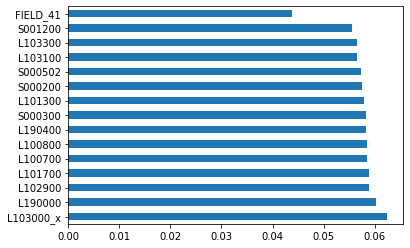

Index(['L103000_x', 'L103300', 'L103100', 'L101700', 'S001200', 'L102900',
       'S000300', 'L100700', 'S000200', 'L100800', 'L190000', 'L101300',
       'L190400', 'S000502', 'FIELD_33', 'FIELD_38', 'FIELD_32', 'FIELD_18',
       'FIELD_40', 'FIELD_41', 'FIELD_19', 'FIELD_21', 'FIELD_14', 'FIELD_25'],
      dtype='object')


In [75]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

print(x.columns)

============================= Backward Elimination
========

In [76]:
import statsmodels.regression.linear_model as sm
temp=x.copy()
regressor_OLS = sm.OLS(endog = y, exog = temp).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              L103000_y   R-squared (uncentered):                   0.817
Model:                            OLS   Adj. R-squared (uncentered):              0.817
Method:                 Least Squares   F-statistic:                              8663.
Date:                Wed, 09 Oct 2019   Prob (F-statistic):                        0.00
Time:                        20:07:03   Log-Likelihood:                     -2.6804e+05
No. Observations:               46571   AIC:                                  5.361e+05
Df Residuals:                   46547   BIC:                                  5.363e+05
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
L103000_x      0.5467      0.004    123.252      0.000       0.538       0.555
L103300        2.2197      1.080      2.055      0.040       0.103       4.337
L103100       -0.8177      0.085     -9.603      0.000      -0.985      -0.651
L101700        0.1361      0.009     15.478      0.000       0.119       0.153
S001200        0.2716      0.101      2.691      0.007       0.074       0.469
L102900        0.1607      0.025      6.458      0.000       0.112       0.210
S000300        0.2217      0.293      0.756      0.450      -0.353       0.796
L100700        4.4854      0.326     13.747      0.000       3.846       5.125
S000200       -0.1062      0.083     -1.274      0.203      -0.270       0.057
L100800       -0.0661      0.030     -2.220      0.026      -0.124      -0.008
L190000        0.8605      0.247      3.490      0.000       0.377       1.344
L101300        0.0458      0.021      2.182      0.029       0.005       0.087
L190400       -0.9470      0.339     -2.791      0.005      -1.612      -0.282
S000502        0.0614      0.043      1.434      0.152      -0.023       0.145
FIELD_33       6.4392      0.489     13.173      0.000       5.481       7.397
FIELD_38       1.9998      0.290      6.893      0.000       1.431       2.569
FIELD_32       1.8066      0.594      3.043      0.002       0.643       2.970
FIELD_18      -5.1044      2.896     -1.763      0.078     -10.780       0.572
FIELD_40       0.4664      0.299      1.560      0.119      -0.120       1.052
FIELD_41       0.2088      0.283      0.738      0.461      -0.346       0.764
FIELD_19      -3.0810      2.202     -1.399      0.162      -7.397       1.235
FIELD_21     -13.1113      8.006     -1.638      0.101     -28.803       2.580
FIELD_14       4.5133      7.012      0.644      0.520      -9.231      18.257
FIELD_25       2.9413      3.620      0.812      0.417      -4.154      10.037
==============================================================================
Omnibus:                    42246.023   Durbin-Watson:                   2.199
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7465334.692
Skew:                           3.791   Prob(JB):                         0.00
Kurtosis:                      64.561   Cond. No.                     9.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
temp=temp.drop(columns=['FIELD_25','FIELD_27','FIELD_18','FIELD_29','FIELD_40','S000501'])
regressor_OLS = sm.OLS(endog = y, exog = temp).fit()
regressor_OLS.summary()

KeyError: "['FIELD_27' 'S000501'] not found in axis"